In [22]:
# import statments
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

# load data
norm_df = pd.read_json('./data/segments_df.json') # use segments_df, not pretty_segments, which has had putative Ns changed to Ds
norm_df = norm_df[norm_df.pretty]
deam_df = pd.read_json('./data/n_to_d_segments_df.json') # this is already filtered for "pretty" segments

### Calculate and print the percent putative deamidation of Asn in different conditions

In [23]:
deam_n = len(deam_df[deam_df.aa == 'N'])
deam_nn = len(deam_df[deam_df.aa == 'N'][deam_df['max'] < 1.3])
deam_nd = len(deam_df[deam_df.aa == 'N'][deam_df['max'] >= 1.3])


norm_n = len(norm_df[norm_df.aa == 'N'])
norm_nn = len(norm_df[norm_df.aa == 'N'][norm_df['max'] < 1.3])
norm_nd = len(norm_df[norm_df.aa == 'N'][norm_df['max'] >= 1.3])

print(f"Normal conditions, % N-> D:{round(norm_nd/(norm_n)*100)}\n Basic conditions, % N-> D:{round(deam_nd/deam_n*100)}")

Normal conditions, % N-> D:10
 Basic conditions, % N-> D:96


/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/263080559.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deam_nn = len(deam_df[deam_df.aa == 'N'][deam_df['max'] < 1.3])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/263080559.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deam_nd = len(deam_df[deam_df.aa == 'N'][deam_df['max'] >= 1.3])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/263080559.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norm_nn = len(norm_df[norm_df.aa == 'N'][norm_df['max'] < 1.3])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/263080559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norm_nd = len(norm_df[norm_df.aa == 'N'][norm_df['max'] >= 1.3])


### Plot the percent putative deamidation of Asn in different conditions for each run

/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/2814218114.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deam_n = len(deam_df[deam_df.run == run][deam_df.aa == 'N'])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/2814218114.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deam_nn = len(deam_df[deam_df.run == run][deam_df.aa == 'N'][deam_df['max'] < 1.3])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/2814218114.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deam_nd = len(deam_df[deam_df.run == run][deam_df.aa == 'N'][deam_df['max'] >= 1.3])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/2814218114.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norm_n = len(norm_df[norm_df.run == run][norm_df.aa == 'N'])
/var/folders/rb/4nfyc06110b944pkssbl1yrw0000gn/T/ipykernel_628/2814218114.py

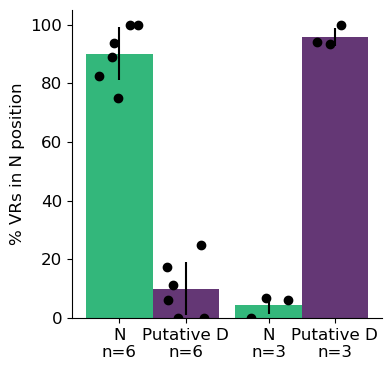

In [25]:
p_deam_nn = []
p_deam_nd = []
p_norm_nn = []
p_norm_nd = []

for run in deam_df.run.unique():
    deam_n = len(deam_df[deam_df.run == run][deam_df.aa == 'N'])
    deam_nn = len(deam_df[deam_df.run == run][deam_df.aa == 'N'][deam_df['max'] < 1.3])
    deam_nd = len(deam_df[deam_df.run == run][deam_df.aa == 'N'][deam_df['max'] >= 1.3])
    # print(f"{run} : {deam_nd/deam_n}, {deam_nn/deam_n}")
    p_deam_nn.append(deam_nn/deam_n*100)
    p_deam_nd.append(deam_nd/deam_n*100)

for run in norm_df[norm_df.aa == 'N'].run.unique():
    norm_n = len(norm_df[norm_df.run == run][norm_df.aa == 'N'])
    norm_nn = len(norm_df[norm_df.run == run][norm_df.aa == 'N'][norm_df['max'] < 1.3])
    norm_nd = len(norm_df[norm_df.run == run][norm_df.aa == 'N'][norm_df['max'] >= 1.3])
    # print(f"{run} : {norm_nd/norm_n}, {norm_nn/norm_n}")
    p_norm_nn.append(norm_nn/norm_n*100)
    p_norm_nd.append(norm_nd/norm_n*100)
p_deam_nn, p_deam_nd, p_norm_nn, p_norm_nd

bar_xs = [0,0.8,1.8,2.6]
figure(figsize=(4,4))

conditions = [p_norm_nn, p_norm_nd, p_deam_nn, p_deam_nd]
bar_ys = [np.mean(x) for x in conditions]
bar_errs = [np.std(x) for x in conditions]

plt.bar(bar_xs, bar_ys, color = ['#33B77B','#643775','#33B77B', '#643775'])
plt.xticks(bar_xs, 
        labels=[l + f"\nn={len(c)}" for l, c in zip(['N', 'Putative D', 'N', 'Putative D'], conditions)],
        fontsize=12)
plt.yticks(fontsize=12)
plt.errorbar(bar_xs, bar_ys, yerr=bar_errs, ls='none', color='black')
plt.ylabel("% VRs in N position", fontsize=12)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none',
"font.family":'arial'
}

for bar_x, ys in zip(bar_xs, conditions):
    for y in ys:
        plt.scatter(bar_x + random.random()/2-0.25, y, color = 'black')
plt.show()